In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from sklearn.datasets import load_iris


In [3]:
# Loading the iris dataset into a variable. The dataset is stored as a dictionary-like object.
iris = load_iris()  

# Displaying the keys of the iris dataset to explore its parameters and structure.
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
df_iris = pd.DataFrame(iris.data,columns=iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


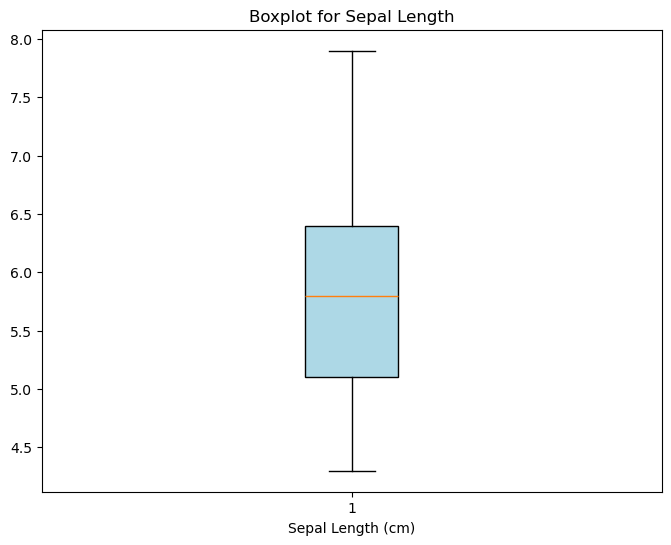

In [12]:
# Lets dermine the outliers in the sepal lenth feature of the givien data set
# plotting the box plot we can detrmine the outliers in the data
# Create a DataFrame from the dataset
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Plot a boxplot for the "sepal length (cm)" feature
plt.figure(figsize=(8, 6))
plt.boxplot(df_iris['sepal length (cm)'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot for Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.show()


In [59]:
## describe funcion in pandas can help us to detmine the q1,q2,q3  of the data 
# Calculate the 25th percentile (Q1) for each column
# Calculate Q1 (25th percentile), Q2 (50th percentile), and Q3 (75th percentile)
q1 = df_iris.quantile(0.25)  # 25th percentile
q2 = df_iris.quantile(0.50)  # 50th percentile (median)
q3 = df_iris.quantile(0.75)  # 75th percentile

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

# Display the results
print("Q1 (25th Percentile):")
print(q1)
print("\nQ2 (50th Percentile - Median):")
print(q2)
print("\nQ3 (75th Percentile):")
print(q3)
print("\nInterquartile Range (IQR):")
print(iqr)

Q1 (25th Percentile):
sepal length (cm)    5.1
sepal width (cm)     2.8
petal length (cm)    1.6
petal width (cm)     0.3
Name: 0.25, dtype: float64

Q2 (50th Percentile - Median):
sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
Name: 0.5, dtype: float64

Q3 (75th Percentile):
sepal length (cm)    6.4
sepal width (cm)     3.3
petal length (cm)    5.1
petal width (cm)     1.8
Name: 0.75, dtype: float64

Interquartile Range (IQR):
sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
dtype: float64


In [63]:
## lets setup the Lower Fence and Upper fence
## So that we can spot the ouliers if theres any one

# Calculate Lower Fence and Upper Fence
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

# Display the results
print("Lower Fence for each feature:")
print(lower_fence)
print("\nUpper Fence for each feature:")
print(upper_fence)

Lower Fence for each feature:
sepal length (cm)    3.15
sepal width (cm)     2.05
petal length (cm)   -3.65
petal width (cm)    -1.95
dtype: float64

Upper Fence for each feature:
sepal length (cm)     8.35
sepal width (cm)      4.05
petal length (cm)    10.35
petal width (cm)      4.05
dtype: float64


In [69]:
## Now lets detrmine if thres any ouiliers 
# Identify outliers for each feature
# Identify outliers for each feature
outliers = {}

for column in df_iris.columns:
    # Calculate Q1, Q3, IQR
    q1 = df_iris[column].quantile(0.25)
    q3 = df_iris[column].quantile(0.75)
    iqr = q3 - q1

    # Calculate Lower Fence and Upper Fence
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr

    # Identify outliers
    outlier_values = df_iris[(df_iris[column] < lower_fence) | (df_iris[column] > upper_fence)][column]
    outliers[column] = outlier_values

# Display outliers for each feature
for feature, outlier_values in outliers.items():
    print(f"Outliers in '{feature}':")
    if outlier_values.empty:
        print("No outliers detected.\n")
    else:
        print(outlier_values.to_string(index=False), "\n")




    

Outliers in 'sepal length (cm)':
No outliers detected.

Outliers in 'sepal width (cm)':
4.4
4.1
4.2
2.0 

Outliers in 'petal length (cm)':
No outliers detected.

Outliers in 'petal width (cm)':
No outliers detected.



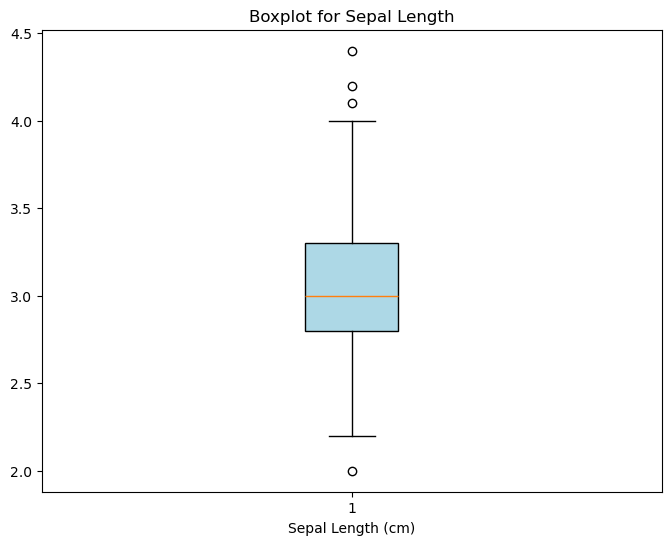

In [73]:
## Since weobserved some outliers in the sepal width feature , lets plot  box plot for the same feature and visualise it
# plotting the box plot we can detrmine the outliers in the data
# Create a DataFrame from the dataset
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Plot a boxplot for the "sepal length (cm)" feature
plt.figure(figsize=(8, 6))
plt.boxplot(df_iris['sepal width (cm)'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot for Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.show()
